<div class="pull-right"> 
<img src= https://upload.wikimedia.org/wikipedia/commons/f/f7/Hochschule_Mannheim_logo.svg "width=350" >
&emsp;
&emsp;
&emsp;
</div>

In [1]:
# wie immer:
import matplotlib.pyplot as plt 

# numpy importieren
import numpy as np

# sympy importieren
import sympy as sy

## Erzwungene Schwingung

### Die Bewegungsgeichung

   
Allgemein haben wir eine Bewegungsgleichung zu lösen:    

\begin{aligned}
m\frac{d^2x}{dt^2}=−kx−\beta\frac{dx}{dt} + F_0\sin(\omega_f t)
\end{aligned}

Wir berücksichtigen, dass im Fall $\beta$=0 (ungedämpfe Schwingungen) $\omega_0=\sqrt{\frac{k}{m}}$ gilt. Weiterhin setzen wir $\frac{\beta}{2m}=\delta$: 

\begin{aligned}
\frac{d^2x}{dt^2}+\omega_0^2 x + 2 \delta \frac{dx}{dt} - F_0\sin(\omega_f t) = 0
\end{aligned}
 

Wir lösen diese Gleichung mit Hilfe von `sympy`, das wir Ihnen näher in [Sprint4](../Sprint4.ipynb) vorgestellt haben. In [diesem Video](https://www.youtube.com/watch?v=3-9Ys1_EwwU) können Sie erfahren, wie man in `sympy` allgemein eine Bewegungsgleichung lösen kann.   

### Lösung der Bewegungsgeichung

Ähnlich wie beim [harmonischen](Bsp2_HarmonischerOszillator.ipynb) oder [gedämpften Oszillator](Bsp3_GedaempfterOszillator.ipynb)

In [2]:
# Symbole definieren
t = sy.symbols('t', real=True)
w0, d, F0, wf = sy.symbols('\\omega_0 \\delta F_0  \\omega_F', real=True, positive=True)

# Funktion X_ES definieren
X_ES = sy.Function('X_ES')

# externe Kraft definieren
F_ext = F0*sy.sin(wf*t)

# Bewegungsgleichung definieren
Gleichung_ES = sy.diff(X_ES(t), t, 2) + w0**2*X_ES(t) + 2*d*sy.diff(X_ES(t), t) - F0*sy.sin(wf*t)

# Bewegungsgleichung mit 'dsolve' lösen
x_los_ES=sy.dsolve(Gleichung_ES) #x_los_ES: Lösung

# Konstanten $C_1$ und $C_2$ mit Nulls ersetzen 
x_los_ES_stat=x_los_ES.subs({"C1":0, "C2":0}).evalf()

In [3]:
x_los_ES_stat

Eq(X_ES(t), -2.0*F_0*\delta*\omega_F*cos(\omega_F*t)/(4.0*\delta**2*\omega_F**2 + \omega_0**4 - 2.0*\omega_0**2*\omega_F**2 + \omega_F**4) + F_0*\omega_0**2*sin(\omega_F*t)/(4.0*\delta**2*\omega_F**2 + \omega_0**4 - 2.0*\omega_0**2*\omega_F**2 + \omega_F**4) - F_0*\omega_F**2*sin(\omega_F*t)/(4.0*\delta**2*\omega_F**2 + \omega_0**4 - 2.0*\omega_0**2*\omega_F**2 + \omega_F**4))

### Systemparameter


In [4]:
omega_0=10  # Kreisfrequenz der freien Schwingung
d0=0.01     # Dämpfungsterm = delta in der Bewegungsgleichung
f0=1        # Kraftamplitude
Wf=10       # Kreisfrequenz Kraft  

Realteil der Lösung nehmen, Symbole $\omega_0$, $\delta$, $F_0$, $\omega_f$ durch Zahlen ersetzen 

In [5]:
x_ES_t=sy.re(x_los_ES_stat.rhs).subs({w0: omega_0, d: d0, F0: f0, wf: Wf}).evalf()

Symbole in der externen Kraft ersetzen

In [6]:
F_ES_t=F_ext.subs({wf:Wf, F0:f0})

### Zeitskala

In [7]:
tt_ES=np.linspace(0,2,500)        # Zeitbereich tt zum Zeichnen definieren 

Zeit Symbol durch die Zeitskala ersetzen

In [8]:
# Ort
x_ES_tt=[x_ES_t.subs({t: tn}).evalf() for tn in tt_ES]# Symbol t durch Werte aus dem Zeitbereich tt_ES ersetzen
# Kraft 
F_ES_tt=[F_ES_t.subs({t: tn}).evalf() for tn in tt_ES]

### Graphische Darstellung der Lösung und der externen Kraft

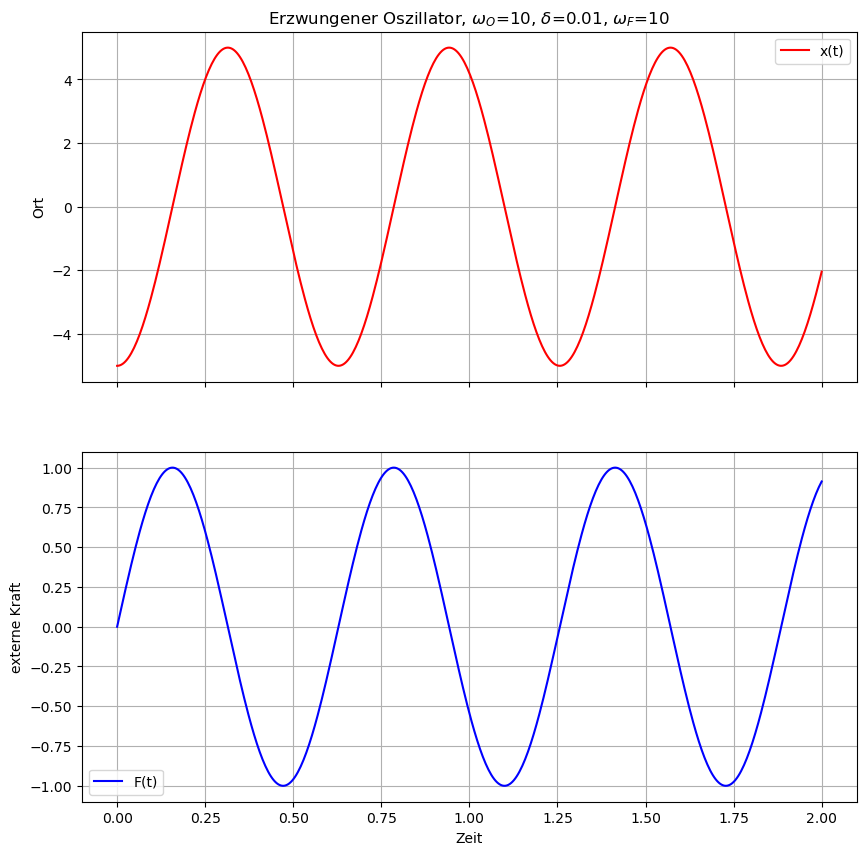

In [9]:
f,ax=plt.subplots(2,1,figsize=(10,10), sharex='col')

# Ort
ax[0].plot(tt_ES, x_ES_tt, 'r',label='x(t)') 
ax[0].set_title('Erzwungener Oszillator, ' +'$\\omega_O$=' + str(omega_0) + ', ' + '$\\delta$=' + str(d0)+ ', ' + '$\\omega_F$=' + str(Wf) )#Titel   
ax[0].legend();               # fügt die Legende ein
ax[0].set_ylabel('Ort')       # fügt y-Achsenbeschriftung ein  
ax[0].grid()             

# externe Kraft
ax[1].plot(tt_ES, F_ES_tt, 'b',label='F(t)') 
ax[1].legend();                     # fügt die Legende ein
ax[1].set_ylabel('externe Kraft') # fügt y-Achsenbeschriftung ein  
ax[1].grid() 
ax[1].set_xlabel('Zeit'); #fügt x-Achsenbeschriftung ein